In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train),len(X_test)

(60000, 10000)

In [12]:
X_train.shape
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
X_train=X_train/255
X_test = X_test/255

# Using just a input and output layer

In [17]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [19]:
model = keras.Sequential(
    [keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')]
                        )
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=10)

C:\Users\arune\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8003 - loss: 0.7428
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9109 - loss: 0.3174
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9190 - loss: 0.2860
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9228 - loss: 0.2726
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9249 - loss: 0.2647
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9257 - loss: 0.2651
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9301 - loss: 0.2509
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9278 - loss: 0.2539
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9302 - loss: 0.2516
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9297 - loss: 0.2521


In [325]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9162 - loss: 0.2990


[0.26502013206481934, 0.9265999794006348]

In [327]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step


In [329]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

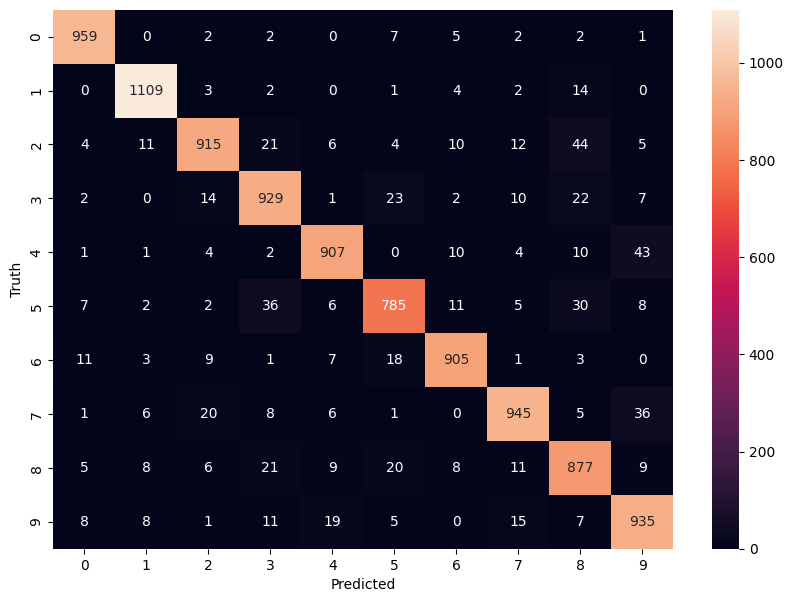

In [331]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Using two Additional Hidden layer

In [334]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                         
                         ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=5)

C:\Users\arune\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8781 - loss: 0.4253
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9682 - loss: 0.1031
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9777 - loss: 0.0713
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9831 - loss: 0.0540
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9873 - loss: 0.0387


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Text(95.72222222222221, 0.5, 'Truth')

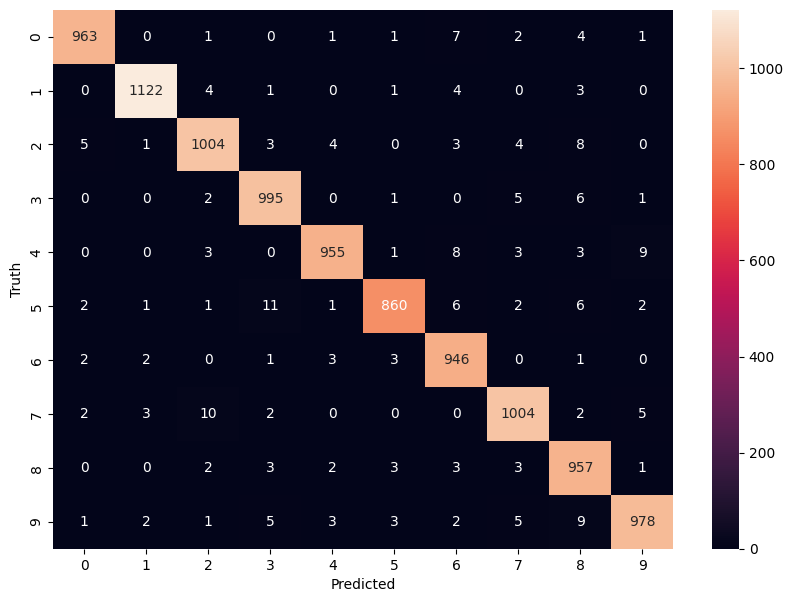

In [336]:
y_predicted=model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Number is: 1
The actual number is: 1


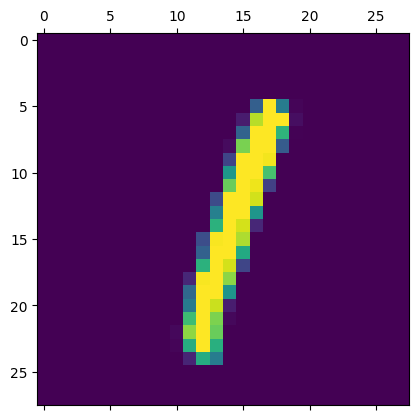

In [338]:

anynumber = 5
print(X_test[anynumber].reshape(1, 28, 28).shape)
y_single_prediction = model.predict(X_test[anynumber].reshape(1, 28, 28))  # Reshape if necessary
plt.matshow(X_test[anynumber])
print("Predicted Number is: " + str(np.argmax(y_single_prediction)))
print("The actual number is: " + str(y_test[anynumber]))

In [ ]:
# GUI Interface

!pip install pillow

In [340]:
import numpy as np
import tkinter as tk
from tkinter import Canvas
from PIL import Image, ImageDraw, ImageOps


class DigitRecognizerGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Handwritten Digit Recognizer")

        # Create a drawing canvas
        self.canvas = Canvas(root, width=280, height=280, bg="black")
        self.canvas.pack()

        # Buttons for prediction and clearing
        self.predict_button = tk.Button(root, text="Predict", command=self.predict_digit, font=("Arial", 12))
        self.predict_button.pack()

        self.clear_button = tk.Button(root, text="Clear", command=self.clear_canvas, font=("Arial", 12))
        self.clear_button.pack()

        # Bind mouse events for drawing
        self.canvas.bind("<B1-Motion>", self.draw)

        # Create an image to store the drawing
        self.image = Image.new("L", (280, 280), "black")  # 'L' mode for grayscale
        self.draw = ImageDraw.Draw(self.image)

    def draw(self, event):
        """Draw white circles on the canvas where the mouse moves."""
        x, y = event.x, event.y
        self.canvas.create_oval(x, y, x+10, y+10, fill="white", outline="white")
        self.draw.ellipse([x, y, x+10, y+10], fill="white")

    def preprocess_image(self):
        """Convert the drawing to a 28x28 grayscale image suitable for the model."""
        img = self.image.resize((28, 28))  # Resize to 28x28
        #img = ImageOps.invert(img)  # Invert colors (white on black → black on white)
        img = np.array(img, dtype=np.float32) / 255.0  # Normalize pixel values (0 to 1)
        img = img.reshape(1, 28, 28)  # Reshape to (1, 28, 28, 1) for model input
        print("Processed Image Shape:", img.shape)  # Debugging print
        return img

    def predict_digit(self):
        """Make a prediction and display the result."""
        img = self.preprocess_image()
        
        # Ensure the image has a valid shape before prediction
        if img.shape != (1, 28, 28):
            print("ERROR: Invalid input shape:", img.shape)
            return
        
        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)

        # Show result in a popup window
        result_window = tk.Toplevel(self.root)
        result_window.title("Prediction Result")
        tk.Label(result_window, text=f"Predicted Digit: {predicted_digit}", font=("Arial", 20)).pack()

    def clear_canvas(self):
        """Clear the canvas and reset the drawing."""
        self.canvas.delete("all")
        self.image = Image.new("L", (280, 280), "black")  # Reset to blank black
        self.draw = ImageDraw.Draw(self.image)

# Run the GUI
root = tk.Tk()
app = DigitRecognizerGUI(root)
root.mainloop()


Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Processed Image Shape: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
